# Decision Tree

1. **What is a Decision Tree, and how does it work?**
- A **Decision Tree** is a supervised machine learning algorithm used for both **classification** and **regression** tasks. It works like a flowchart where:

* **Each internal node** represents a decision based on a feature (e.g., "Is age > 50?").
* **Each branch** represents the outcome of that decision (yes/no).
* **Each leaf node** represents the final output or prediction.

### How it works:

1. **Select the best feature** to split the data based on a criterion (like Gini impurity, entropy, or variance).
2. **Split the dataset** into subsets based on that feature.
3. **Repeat the process** recursively for each subset.
4. **Stop splitting** when a stopping condition is met (e.g., max depth, pure nodes, or minimum samples).



**2.What are impurity measures in Decision Trees?**
- **Impurity measures** in Decision Trees help determine how "mixed" or "impure" a node is. A pure node contains data points mostly from one class, while an impure node has a mix of classes. These measures guide how the tree splits the data.

### Common impurity measures:

1. **Gini Impurity (used in CART):**

   $$
   Gini = 1 - \sum p_i^2
   $$

   Where $p_i$ is the probability of class $i$. Lower Gini means purer nodes.

2. **Entropy (used in ID3):**

   $$
   Entropy = - \sum p_i \log_2(p_i)
   $$

   Measures the level of uncertainty. Zero entropy means pure class.

3. **Classification Error:**

   $$
   Error = 1 - \max(p_i)
   $$

   Simple but less sensitive than Gini or Entropy.

4. **Variance (for regression trees):**

   $$
   Variance = \frac{1}{n} \sum (y_i - \bar{y})^2
   $$

   Used to measure impurity in regression tasks.

Each splitting decision aims to **reduce impurity** in the resulting child nodes.


**3. What is the mathematical formula for Gini Impurity?**
- The **mathematical formula** for **Gini Impurity** is:

$$
Gini = 1 - \sum_{i=1}^{C} p_i^2
$$

Where:

* $C$ = number of classes
* $p_i$ = proportion of samples belonging to class $i$ in the node

### Example:

If a node has 3 classes with proportions $p_1 = 0.5$, $p_2 = 0.3$, $p_3 = 0.2$, then:

$$
Gini = 1 - (0.5^2 + 0.3^2 + 0.2^2) = 1 - (0.25 + 0.09 + 0.04) = 1 - 0.38 = 0.62
$$

A Gini of **0** means the node is pure.


**4. What is the mathematical formula for Entropy?**
- The **mathematical formula** for **Entropy** is:

$$
Entropy = - \sum_{i=1}^{C} p_i \log_2(p_i)
$$

Where:

* $C$ = number of classes
* $p_i$ = proportion of samples belonging to class $i$ in the node

### Notes:

* If $p_i = 0$, then $p_i \log_2(p_i)$ is treated as 0.
* Entropy ranges from **0 (pure node)** to **log₂(C) (maximum impurity)**.

### Example:

If a node has 2 classes with $p_1 = 0.5$, $p_2 = 0.5$:

$$
Entropy = - (0.5 \log_2 0.5 + 0.5 \log_2 0.5) = - (0.5 \times -1 + 0.5 \times -1) = 1
$$

So, this is a highly impure (uncertain) node.


**5. What is Information Gain, and how is it used in Decision Trees?**
- **Information Gain (IG)** measures how much **uncertainty (entropy)** is reduced after splitting a dataset based on an attribute. It is used in **Decision Trees** (like ID3) to choose the best feature for splitting.

### **Formula:**

$$
IG(S, A) = Entropy(S) - \sum_{v \in Values(A)} \frac{|S_v|}{|S|} \cdot Entropy(S_v)
$$

Where:

* $S$ = original dataset
* $A$ = feature to split on
* $v$ = possible values of feature $A$
* $S_v$ = subset of $S$ where $A = v$

### **How it's used:**

1. **Calculate the entropy** of the current dataset.
2. For each feature, **compute the entropy of subsets** created by splitting on that feature.
3. **Subtract weighted subset entropies** from the original entropy → this gives Information Gain.
4. **Choose the feature** with the **highest IG** for the split.

Higher Information Gain = better feature for reducing impurity.


**6. What is the difference between Gini Impurity and Entropy?**
- Here’s a clear comparison between **Gini Impurity** and **Entropy**:

| Feature             | Gini Impurity                       | Entropy                                      |
| ------------------- | ----------------------------------- | -------------------------------------------- |
| **Formula**         | $1 - \sum p_i^2$                    | $-\sum p_i \log_2(p_i)$                      |
| **Range**           | 0 (pure) to \~0.5 (binary split)    | 0 (pure) to 1 (binary split)                 |
| **Computation**     | Simpler and faster                  | Slightly more complex due to log calculation |
| **Used in**         | CART algorithm                      | ID3, C4.5 algorithms                         |
| **Splitting bias**  | Prefers larger partitions           | Can favor more balanced splits               |
| **Output behavior** | Often similar to entropy in results | More theoretically grounded (info theory)    |



**7. What is the mathematical explanation behind Decision Trees?**
- Here’s the **mathematical explanation of Decision Trees in sentences**:

A Decision Tree starts with a dataset containing features and class labels. At each node, it calculates the **impurity** (such as Gini or Entropy) to measure how mixed the classes are. Then, for every possible split (based on feature and threshold), it divides the data into two subsets and calculates the **weighted impurity** of the split.

The difference between the impurity before and after the split is called **Information Gain**. The split with the **highest Information Gain** (or lowest impurity) is selected. This process is **repeated recursively** for each subset until the data is pure (all one class) or a stopping condition is met (like max depth or minimum samples).

In this way, the tree grows by choosing splits that **mathematically reduce impurity** at each step.


**8. What is Pre-Pruning in Decision Trees?**
- **Pre-pruning** in Decision Trees means stopping the tree from growing further during its construction when certain conditions are met. It helps prevent the model from becoming too complex and overfitting the training data.

For example, the tree may stop splitting a node if it has too few samples, if the depth limit is reached, or if the split does not significantly reduce impurity. By applying pre-pruning, we ensure the tree remains simpler, faster, and more generalizable.


**9. What is Post-Pruning in Decision Trees?**
- **Post-pruning** in Decision Trees means allowing the tree to grow fully first and then cutting back some branches afterward. This helps remove parts of the tree that may be overfitting the training data.

After the full tree is built, branches that do not improve the model’s performance on a validation set are pruned (removed). This makes the tree simpler and improves its ability to generalize to new data.


**10. What is the difference between Pre-Pruning and Post-Pruning?**
- **Pre-pruning** stops the tree from growing too big during training by applying rules like max depth or minimum samples before splitting nodes. It prevents overfitting early by limiting the tree’s size.

- **Post-pruning** lets the tree grow fully and then removes unnecessary branches afterward based on performance on validation data. It simplifies the tree after seeing the full structure.

In short, pre-pruning stops growth early, while post-pruning cuts back after full growth.


**11. What is a Decision Tree Regressor?**
- A **Decision Tree Regressor** is a type of decision tree used for predicting continuous numerical values instead of categories. It splits the data based on feature values to create regions with similar target values and makes predictions by averaging the values in each region.


**12. What are the advantages and disadvantages of Decision Trees?**
- **Advantages of Decision Trees:**

* Easy to understand and interpret because they mimic human decision-making.
* Can handle both numerical and categorical data.
* Requires little data preprocessing (no need to scale or normalize).
* Can capture non-linear relationships.
* Useful for feature selection by showing important features.

**Disadvantages of Decision Trees:**

* Prone to overfitting, especially with deep trees.
* Small changes in data can cause big changes in the tree structure.
* Can be biased towards features with more levels or categories.
* Usually less accurate compared to ensemble methods like Random Forests or Gradient Boosting.


**13. How does a Decision Tree handle missing values?**
- A Decision Tree can handle missing values in a few ways:

1. **Ignore missing values during split calculation:** Some algorithms skip missing data when deciding the best split.
2. **Use surrogate splits:** When the main splitting feature is missing, the tree uses another correlated feature (surrogate) to decide the path.
3. **Assign missing values to the most common or weighted branch:** Missing data can be sent down the branch that has the majority of samples or weighted based on probabilities.

These methods help the tree make decisions even when some feature values are missing.


**14.How does a Decision Tree handle categorical features?**
- A Decision Tree handles **categorical features** by splitting the data based on the categories. For example, it can:

* **Create a branch for each category** (if the number of categories is small).
* Or, **group categories** into two or more subsets and split based on those groups (especially if there are many categories).

The tree chooses the split that best separates the classes or reduces impurity, treating categorical values as distinct groups rather than numeric ranges.


**15. What are some real-world applications of Decision Trees?**
- Here are some real-world applications of Decision Trees:

* **Customer churn prediction:** Identifying which customers are likely to leave a service.
* **Loan approval:** Deciding whether to approve or reject a loan based on applicant data.
* **Medical diagnosis:** Classifying diseases based on patient symptoms and test results.
* **Fraud detection:** Spotting suspicious transactions in banking or insurance.
* **Marketing:** Segmenting customers for targeted advertising.
* **Quality control:** Detecting defects in manufacturing processes.

Decision Trees are popular because they are interpretable and work well across many fields.


In [1]:
#16.Write a Python program to train a Decision Tree Classifier on the Iris dataset and print the model accuracy.
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train Decision Tree Classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Predict on test data
y_pred = clf.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy:.2f}")


Model accuracy: 1.00


In [2]:
#17. Write a Python program to train a Decision Tree Classifier using Gini Impurity as the criterion and print the feature importances
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Initialize Decision Tree with Gini impurity
clf = DecisionTreeClassifier(criterion='gini', random_state=42)

# Train the model
clf.fit(X, y)

# Print feature importances
print("Feature importances:")
for feature, importance in zip(iris.feature_names, clf.feature_importances_):
    print(f"{feature}: {importance:.4f}")

Feature importances:
sepal length (cm): 0.0133
sepal width (cm): 0.0000
petal length (cm): 0.5641
petal width (cm): 0.4226


In [3]:
#18. Write a Python program to train a Decision Tree Classifier using Entropy as the splitting criterion and print the model accuracy.
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Decision Tree with Entropy criterion
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy:.2f}")


Model accuracy: 0.98


In [23]:
#19. Write a Python program to train a Decision Tree Regressor on a housing dataset and evaluate using Mean Squared Error (MSE).
from sklearn.datasets import fetch_california_housing # Import alternative dataset
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Load California Housing dataset instead of Boston Housing
# boston = load_boston() # Removed deprecated function call
housing = fetch_california_housing() # Load California Housing dataset
X = housing.data
y = housing.target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=42)

# Train the model
regressor.fit(X_train, y_train)

# Predict on test set
y_pred = regressor.predict(X_test)

# Calculate and print Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 0.53


In [5]:
#20. Write a Python program to train a Decision Tree Classifier and visualize the tree using graphviz.
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Train Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

# Export the tree to DOT format
dot_data = export_graphviz(
    clf,
    out_file=None,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True,
    rounded=True,
    special_characters=True
)

# Visualize using graphviz
graph = graphviz.Source(dot_data)
graph.render("iris_decision_tree")  # Saves to iris_decision_tree.pdf
graph.view()  # Opens the PDF viewer to display the tree


'iris_decision_tree.pdf'

In [10]:
#21. Write a Python program to train a Decision Tree Classifier with a maximum depth of 3 and compare its accuracy with a fully grown tree.

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load data
iris = load_iris()
X, y = iris.data, iris.target

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Tree with max depth 3
clf_limited = DecisionTreeClassifier(max_depth=3, random_state=42)
clf_limited.fit(X_train, y_train)
y_pred_limited = clf_limited.predict(X_test)
acc_limited = accuracy_score(y_test, y_pred_limited)

# Fully grown tree (no max depth)
clf_full = DecisionTreeClassifier(random_state=42)
clf_full.fit(X_train, y_train)
y_pred_full = clf_full.predict(X_test)
acc_full = accuracy_score(y_test, y_pred_full)

print(f"Accuracy with max depth 3: {acc_limited:.2f}")
print(f"Accuracy of fully grown tree: {acc_full:.2f}")



Accuracy with max depth 3: 1.00
Accuracy of fully grown tree: 1.00


In [11]:
#22. Write a Python program to train a Decision Tree Classifier using min_samples_split=5 and compare its accuracy with a default tree.
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Decision Tree with min_samples_split=5
clf_custom = DecisionTreeClassifier(min_samples_split=5, random_state=42)
clf_custom.fit(X_train, y_train)
y_pred_custom = clf_custom.predict(X_test)
acc_custom = accuracy_score(y_test, y_pred_custom)

# Default Decision Tree
clf_default = DecisionTreeClassifier(random_state=42)
clf_default.fit(X_train, y_train)
y_pred_default = clf_default.predict(X_test)
acc_default = accuracy_score(y_test, y_pred_default)

print(f"Accuracy with min_samples_split=5: {acc_custom:.2f}")
print(f"Accuracy with default parameters: {acc_default:.2f}")


Accuracy with min_samples_split=5: 1.00
Accuracy with default parameters: 1.00


In [12]:
#23. Write a Python program to apply feature scaling before training a Decision Tree Classifier and compare its accuracy with unscaled data.
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1. Train on unscaled data
clf_unscaled = DecisionTreeClassifier(random_state=42)
clf_unscaled.fit(X_train, y_train)
y_pred_unscaled = clf_unscaled.predict(X_test)
acc_unscaled = accuracy_score(y_test, y_pred_unscaled)

# 2. Scale features and train
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf_scaled = DecisionTreeClassifier(random_state=42)
clf_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = clf_scaled.predict(X_test_scaled)
acc_scaled = accuracy_score(y_test, y_pred_scaled)

print(f"Accuracy without scaling: {acc_unscaled:.2f}")
print(f"Accuracy with scaling: {acc_scaled:.2f}")


Accuracy without scaling: 1.00
Accuracy with scaling: 1.00


In [13]:
#24. Write a Python program to train a Decision Tree Classifier using One-vs-Rest (OvR) strategy for multiclass classification.
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize OvR with Decision Tree
ovr_clf = OneVsRestClassifier(DecisionTreeClassifier(random_state=42))

# Train the model
ovr_clf.fit(X_train, y_train)

# Predict on test data
y_pred = ovr_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"OvR Decision Tree accuracy: {accuracy:.2f}")


OvR Decision Tree accuracy: 1.00


In [14]:
#25. Write a Python program to train a Decision Tree Classifier and display the feature importance scores.
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Train Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

# Display feature importance scores
print("Feature importances:")
for feature, importance in zip(iris.feature_names, clf.feature_importances_):
    print(f"{feature}: {importance:.4f}")


Feature importances:
sepal length (cm): 0.0133
sepal width (cm): 0.0000
petal length (cm): 0.5641
petal width (cm): 0.4226


In [22]:
#26. Write a Python program to train a Decision Tree Regressor with max_depth=5 and compare its performance with an unrestricted tree.
from sklearn.datasets import fetch_california_housing # Import alternative dataset
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Load California Housing dataset instead of Boston Housing
# boston = load_boston() # Removed deprecated function call
housing = fetch_california_housing() # Load California Housing dataset
X, y = housing.data, housing.target # Use the new dataset

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Regressor with max_depth=5
regressor_limited = DecisionTreeRegressor(max_depth=5, random_state=42)
regressor_limited.fit(X_train, y_train)
y_pred_limited = regressor_limited.predict(X_test)
mse_limited = mean_squared_error(y_test, y_pred_limited)

# Unrestricted regressor
regressor_full = DecisionTreeRegressor(random_state=42)
regressor_full.fit(X_train, y_train)
y_pred_full = regressor_full.predict(X_test)
mse_full = mean_squared_error(y_test, y_pred_full)

print(f"MSE with max_depth=5: {mse_limited:.2f}")
print(f"MSE with unrestricted tree: {mse_full:.2f}")


MSE with max_depth=5: 0.52
MSE with unrestricted tree: 0.53


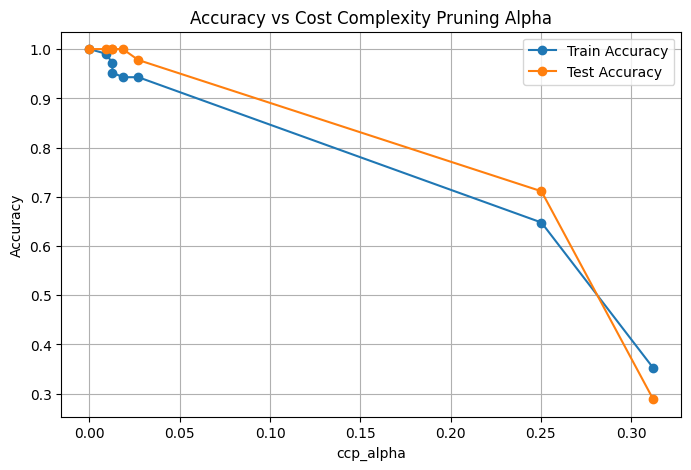

In [16]:
#27. Write a Python program to train a Decision Tree Classifier, apply Cost Complexity Pruning (CCP), and visualize its effect on accuracy.
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Load data
iris = load_iris()
X, y = iris.data, iris.target

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a fully grown tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Get cost complexity pruning path
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Train trees for each alpha and record accuracy
train_scores = []
test_scores = []

for ccp_alpha in ccp_alphas:
    clf_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf_pruned.fit(X_train, y_train)
    train_scores.append(clf_pruned.score(X_train, y_train))
    test_scores.append(clf_pruned.score(X_test, y_test))

# Plot accuracy vs alpha
plt.figure(figsize=(8, 5))
plt.plot(ccp_alphas, train_scores, marker='o', label='Train Accuracy')
plt.plot(ccp_alphas, test_scores, marker='o', label='Test Accuracy')
plt.xlabel('ccp_alpha')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Cost Complexity Pruning Alpha')
plt.legend()
plt.grid(True)
plt.show()


In [17]:
#28. Write a Python program to train a Decision Tree Classifier and evaluate its performance using Precision,Recall, and F1-Score.
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Print classification report (Precision, Recall, F1-score)
print(classification_report(y_test, y_pred, target_names=iris.target_names))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



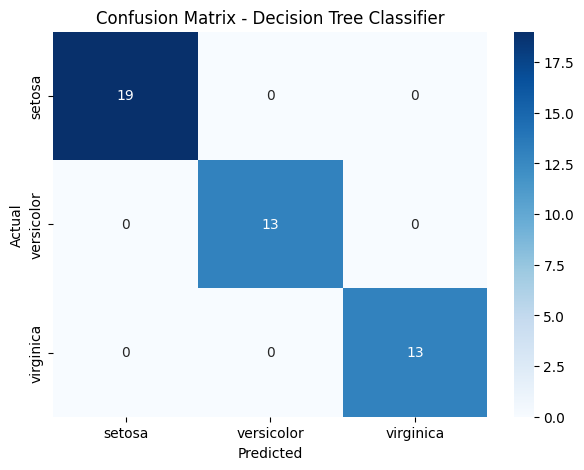

In [18]:
#29. Write a Python program to train a Decision Tree Classifier and visualize the confusion matrix using seaborn.
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree Classifier")
plt.show()


In [19]:
#30. Write a Python program to train a Decision Tree Classifier and use GridSearchCV to find the optimal values for max_depth and min_samples_split.
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define model
clf = DecisionTreeClassifier(random_state=42)

# Define parameter grid
param_grid = {
    'max_depth': [2, 3, 4, 5, None],
    'min_samples_split': [2, 5, 10]
}

# Setup GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best params and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.2f}")

# Evaluate best estimator on test set
best_clf = grid_search.best_estimator_
test_accuracy = best_clf.score(X_test, y_test)
print(f"Test set accuracy with best params: {test_accuracy:.2f}")


Best parameters: {'max_depth': 4, 'min_samples_split': 10}
Best cross-validation accuracy: 0.94
Test set accuracy with best params: 1.00
